In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score

# Diabetes Prediction

The **Goal** is to predict diabetes using the patients historical medical information

Columns:

- **pregnant**: number of pregnancies the patient has had
- **glucose**: plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **bp**: diastolic blood pressure (mm Hg)
- **skin**: Triceps skin fold thickness (mm)
- **insulin**: 2-Hour serum insulin (mu U/ml)
- **bmi**: Body mass index (weight in kg/(height in m)^2)
- **Age**: age (years)

### Data exploration

In [2]:
# load data
path = '/Users/liamhettinger/Documents/Portfolio_work/Data/pima.csv'
pima = pd.read_csv(path)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,age,label
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


**1** = patient has diabetes
**0** = patient does not have diabetes.

In [3]:
#target variable
pima.label.value_counts() # 

label
0    500
1    268
Name: count, dtype: int64

In [4]:
#null value count
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
age         0
label       0
dtype: int64

In [5]:
#data types
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
age           int64
label         int64
dtype: object

In [6]:
#(rows, columns)
pima.shape

(768, 8)

In [7]:
# define X and y
X = pima.drop('label', axis=1)
y = pima.label

In [8]:
# split X and y into training and testing sets. 75% of the dataset will be used from training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

- **colsample_bytree** proportion of the sample used to train the tree. Similar to a random forest. 
- **Gamma** Required loss reduction to make another node. The larger gamma is, the more conservative the algorithm will be. Range: [0,∞]
- **learning_rate** Boosting assigns feature weights. The learning rate shrinks those weights to prevent overfitting. Step size shrinkage. Prevents overfitting. range: [0,1]

In [9]:
#establishing parameters
params = {
    'learning_rate': [.05, .1, .2],
    'max_depth': [1, 2, 4, 6],
    'colsample_bytree': [0.5, 0.75]
    }

In [10]:
#defining model
xgb = XGBClassifier()

In [11]:
# train a XGBoost model on the training set
grid = GridSearchCV(xgb, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [12]:
#Fitting model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 4, 6]},
             scoring='accuracy', verbose=1)

In [13]:
# make class predictions for the testing set
y_test_pred = grid.predict(X_test)

### Classification accuracy

In [14]:
# first 30 true and predicted responses
print('True:',y_test.to_numpy()[0:30])
print('Pred:',y_test_pred[0:30])

True: [0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1]
Pred: [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


The **classification accuracy** is the percentage of correct predictions

In [15]:
accuracy_score(y_test, y_test_pred)

0.7604166666666666

**Confusion matrix**

In [16]:
confusion_matrix(y_test,y_test_pred)

array([[118,  13],
       [ 33,  28]])

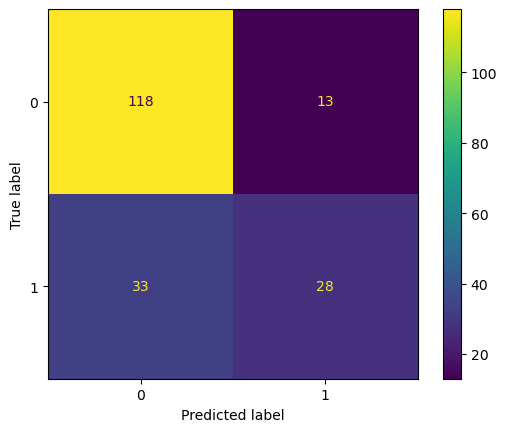

In [17]:
# visualize confusion matrix
confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred))
confusion.plot()

In [18]:
# save confusion matrix and slice it into four pieces
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**Recall**

In [19]:
TP/(TP+FN)

0.45901639344262296

In [20]:
recall_score(y_test,y_test_pred)

0.45901639344262296

**Specificity**

In [21]:
TN/(TN+FP)

0.9007633587786259

**Precision**

In [22]:
TP/(TP+FP)

0.6829268292682927

In [23]:
# using sklearn
precision_score(y_test,y_test_pred)

0.6829268292682927

**F1 score**

In [24]:
f1_score(y_test,y_test_pred)

0.5490196078431373

**Balanced accuracy**

In [25]:
balanced_accuracy_score(y_test,y_test_pred)

0.6798898761106245